In [1]:
import numpy as np
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector

## Algoritmo de Deutsch-Jozsa para 3 qubits

In [2]:
n = 3

In [3]:
def circuitoIni(n):
    qc = QuantumCircuit(n+1,n)
    qc.x(n)
    qc.h(range(n+1))
    return qc

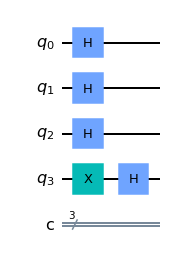

In [4]:
qc = circuitoIni(n)
qc.draw('mpl')

In [5]:
def circuitoFin(n):
    qc3 = QuantumCircuit(n+1,n)
    qc3.h(range(n))
    for i in range(n):
            qc3.measure(i, i)
    qc3.draw('mpl')
    return qc3

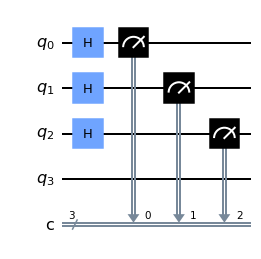

In [6]:
qc = circuitoFin(n)
qc.draw('mpl')

### Constantes para 3 qubits

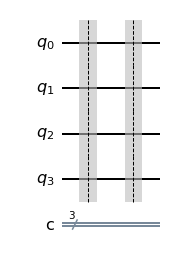

In [7]:
constante0 = QuantumCircuit(n+1,n)
constante0.barrier()
constante0.barrier()
constante0.draw('mpl')

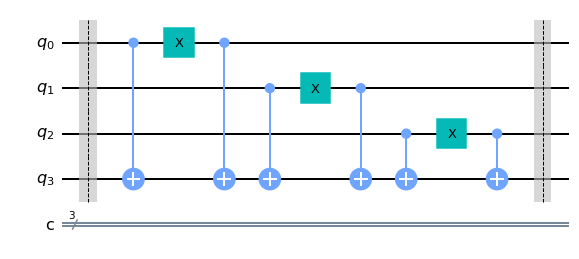

In [8]:
constante1 = QuantumCircuit(n+1,n)
constante1.barrier()
constante1.cx(0,n)
constante1.x(0)
constante1.cx(0,n)
constante1.cx(1,n)
constante1.x(1)
constante1.cx(1,n)
constante1.cx(2,n)
constante1.x(2)
constante1.cx(2,n)
constante1.barrier()
constante1.draw('mpl')

### Balanceado para 3 qubits

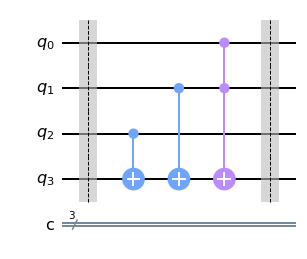

In [9]:
balanced1 = QuantumCircuit(n+1,n)
balanced1.barrier(range(n+1))
balanced1.cx(n-1,n)
balanced1.cx(1,n)
balanced1.ccx(0,1,n)
balanced1.barrier(range(n+1))
balanced1.draw('mpl')

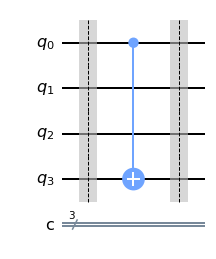

In [10]:
balanced0 = QuantumCircuit(n+1,n)
balanced0.barrier()
balanced0.cx(0,3)
balanced0.barrier()
balanced0.draw('mpl')

In [11]:
#anhadimos los oraculos en el diccionario
oraculos = dict()
oraculos['constante0'] = constante0
oraculos['constante1'] = constante1
oraculos['balanced1'] = balanced1
oraculos['balanced0'] = balanced0

In [12]:
def deutsch_jozsa(n, oraculo):
    qc = QuantumCircuit(n+1,n)
    qc += circuitoIni(n)
    qc +=oraculos[oraculo]
    qc +=circuitoFin(n)
    return qc

### Contante 0

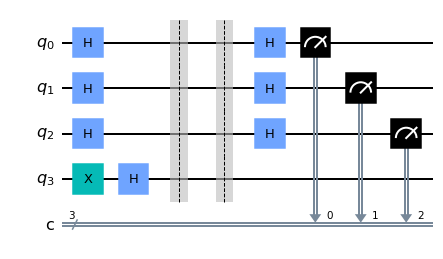

In [13]:
constante0Circuit = deutsch_jozsa(n, 'constante0')
constante0Circuit.draw('mpl')

#### Simulacion en un simulador

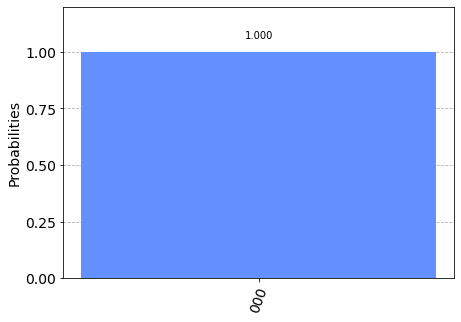

In [14]:
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(constante0Circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

Como vemos, con el oraculo constante, nos dio el resultado de esperado, un probabilidad de 100% en los bits 000.

### Contante 1

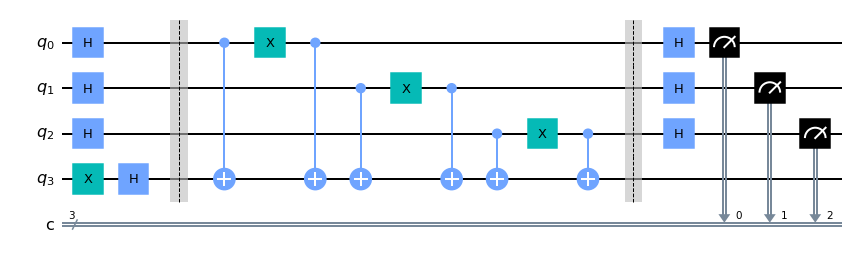

In [15]:
constante1Circuit = deutsch_jozsa(n, 'constante1')
constante1Circuit.draw('mpl')

#### Simulacion en un simulador

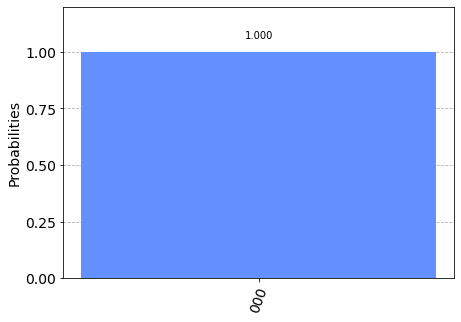

In [16]:
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(constante1Circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

Como vemos, con el oraculo constante, nos dio el resultado de esperado, un probabilidad de 100% en los bits 00.

### Balanceado 0

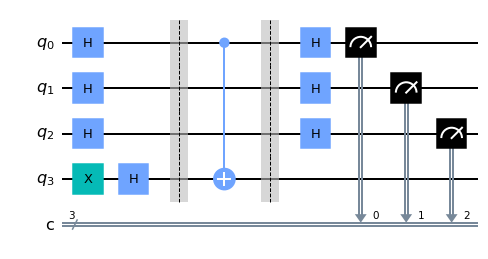

In [17]:
balanced0Circuit = deutsch_jozsa(n, 'balanced0')
balanced0Circuit.draw('mpl')

#### Simulacion en un simulador

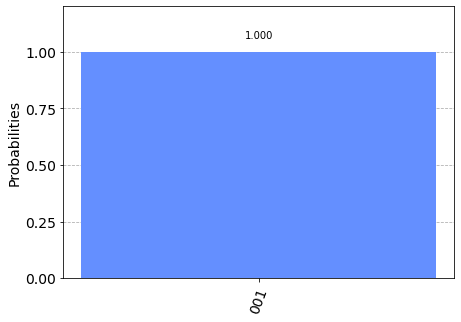

In [18]:
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(balanced0Circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

Podemos observar con el oraculo balanceada, nos da ls bits diferente que 000, por lo este oraculo funciona.

### Balanceado 1

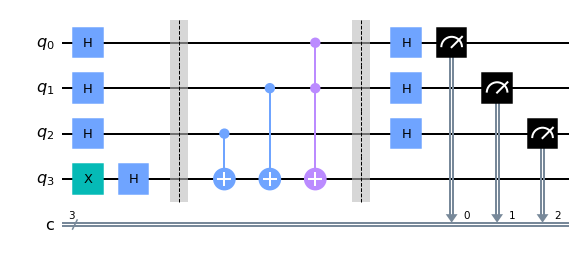

In [19]:
balanced1Circuit = deutsch_jozsa(n, 'balanced1')
balanced1Circuit.draw('mpl')

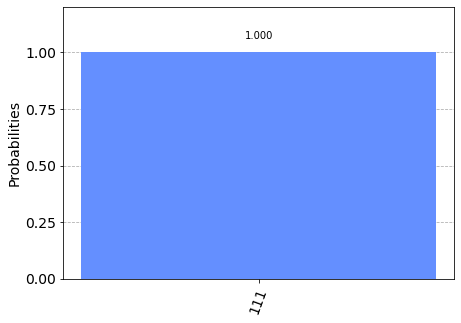

In [36]:
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(balanced1Circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

Como podemos observar, usando el otro oraculo balanceado, nos ha devuelto el 100% con los bits 111.

## Simulacion en un Backend real

In [25]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

/home/feynman/anaconda3/envs/qiskitEnv/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


least busy backend:  ibmq_athens


#### Constante 0

In [27]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_dj_circuit = transpile(constante0Circuit, backend, optimization_level=3)
qobj = assemble(transpiled_dj_circuit, backend)
job = backend.run(qobj)
job_monitor(job, interval=2)

Job Status: job has successfully run


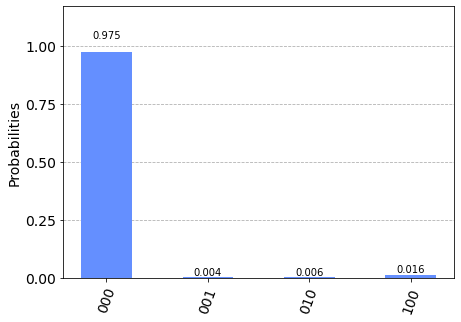

In [28]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

En la ejecucion del Backend real, podemos ver que el bit 000 tiene mas de 97% de porbabilidad de salir, esto es debido al ruido en las ejecuciones del Backend real.

#### Constante 1

In [29]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_dj_circuit = transpile(constante1Circuit, backend, optimization_level=3)
qobj = assemble(transpiled_dj_circuit, backend)
job = backend.run(qobj)
job_monitor(job, interval=2)

Job Status: job has successfully run


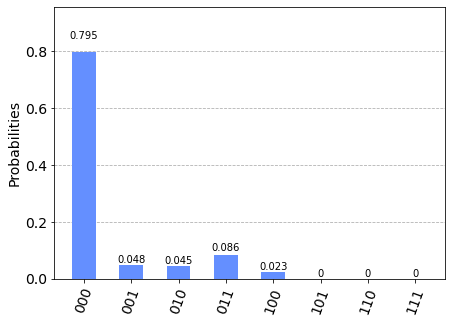

In [30]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

En este apartado, pasa lo mismo que en el apartado anterior. El algoritmo funciona correctamente.

#### Balanceado 0

In [31]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_dj_circuit = transpile(balanced0Circuit, backend, optimization_level=3)
qobj = assemble(transpiled_dj_circuit, backend)
job = backend.run(qobj)
job_monitor(job, interval=2)

Job Status: job has successfully run


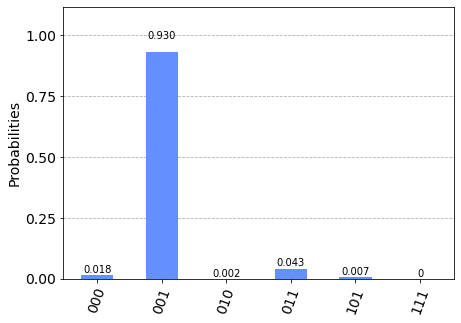

In [32]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

Al ejecutar en el Backend real con el oraculo Balanceado, nos ha dado un alto porcentaje del resultado esperado.

#### Balanceado 1

In [34]:
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_dj_circuit = transpile(balanced1Circuit, backend, optimization_level=3)
qobj = assemble(transpiled_dj_circuit, backend)
job = backend.run(qobj)
job_monitor(job, interval=2)

Job Status: job has successfully run


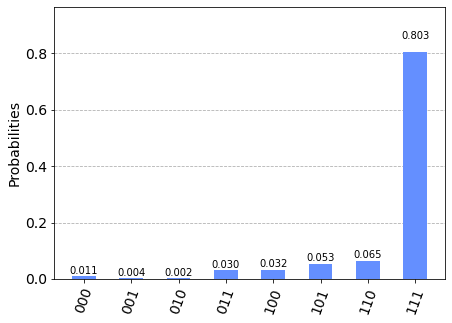

In [35]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

Al ejecutar en el Backend real con el oraculo Balanceado, nos ha dado un alto porcentaje del resultado esperado.